In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ball.jpg to ball.jpg
Saving butter.jpg to butter.jpg


In [ ]:
from google.colab.patches import cv2_imshow

Simple thresholding

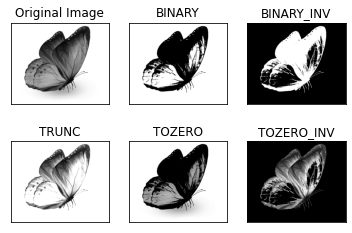

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('butter.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Adaptive thresholding

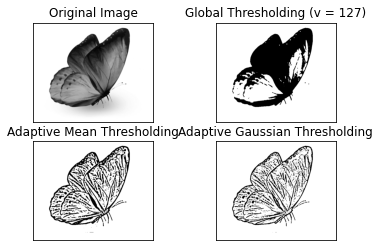

In [ ]:
img = cv2.imread('butter.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Adding borders

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

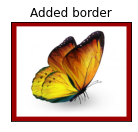

In [ ]:
src = cv2.imread('butter.jpg')
borderType = cv2.BORDER_CONSTANT
top = int(0.05 * src.shape[0])  # shape[0] = rows
bottom = top
left = int(0.05 * src.shape[1])  # shape[1] = cols
right = left
value = 156
dst = cv2.copyMakeBorder(src, top, bottom, left, right, borderType, None, value)
plt.subplot(2,2,1),plt.imshow(dst,'gray')
plt.title('Added border')
plt.xticks([]),plt.yticks([])


Segmentation using watershed transform

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

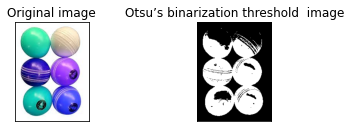

In [ ]:
img = cv2.imread('ball.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#cv2_imshow(thresh)
plt.subplot(2,2,1),plt.imshow(img,'gray')
plt.title('Original image')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh,'gray')
plt.title('Otsu’s binarization threshold  image')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

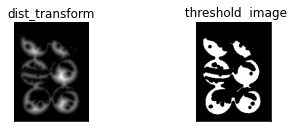

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
#cv2_imshow(dist_transform)
#cv2_imshow(sure_fg)
plt.subplot(2,2,1),plt.imshow(dist_transform,'gray')
plt.title('dist_transform')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sure_fg,'gray')
plt.title(' threshold  image')
plt.xticks([]),plt.yticks([])

(Text(0.5, 1.0, ' Marker image after segmentation'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

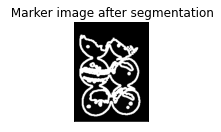

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 255
plt.subplot(2,2,1),plt.imshow(markers,'gray')
plt.title(' Marker image after segmentation'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Result Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

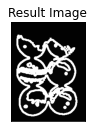

In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(2,2,1),plt.imshow(markers,'gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])